In [1]:
import numpy as np

def criaDatasetBidimensionalBinárioInclinado(n=20, slop=[2, 1], intercept=0.4):
    """
    Cria um dataset bidimensional binário com
    inclinação e interceptação do eixo vertical
    parametrizados.
    """
    X = np.random.uniform(size=(n,2))
    AUX = np.multiply(X, slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [2, 1]
intercept = -0.4
Xtr, ytr = criaDatasetBidimensionalBinárioInclinado(n=20, slop=slop, intercept=intercept)
Xtr, ytr

(array([[0.26890219, 0.76000876],
        [0.59885383, 0.7595677 ],
        [0.17926511, 0.78995248],
        [0.70841125, 0.01376223],
        [0.92729475, 0.41148241],
        [0.22297736, 0.13279583],
        [0.70831043, 0.45117836],
        [0.90242492, 0.8767649 ],
        [0.0672118 , 0.65857557],
        [0.75890213, 0.68823976],
        [0.8727143 , 0.0362102 ],
        [0.78004488, 0.54614568],
        [0.26016188, 0.21131304],
        [0.98214207, 0.60243634],
        [0.30786427, 0.49964373],
        [0.98307934, 0.32975046],
        [0.9952327 , 0.15254783],
        [0.4702537 , 0.84307828],
        [0.67422445, 0.00506848],
        [0.89653227, 0.22263795]]),
 array([-1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
        -1,  1,  1]))

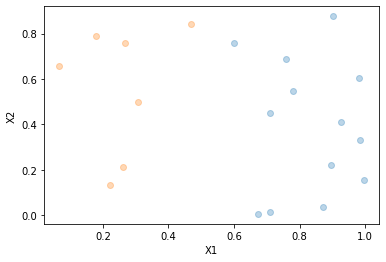

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

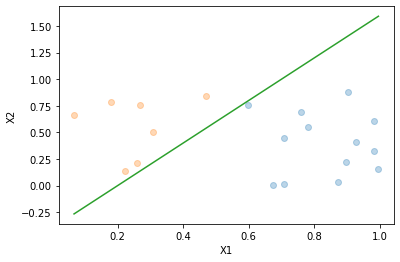

In [3]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

plotaDatasetBidimensional(Xtr, ytr)
vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

In [4]:
def sign(a):
    return (a >= 0) * 2 - 1

In [5]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

1.0
[-2.80591593 14.13089651 -4.74271479]


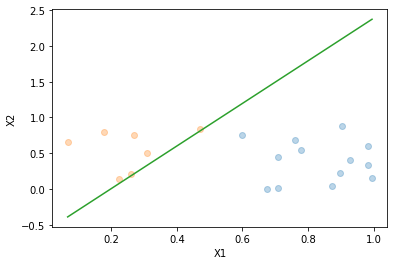

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron com limite de iterações,
    treinado em batch, com bias.
    """
    def __init__(self, max_iter=100):
        self.w = None
        self.activation = sign
        self.max_iter = max_iter
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.max_iter):
            ypred = self.predict(X)
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            self.w += Xb.T @ erros

    def predict(self, X):
        Xb = Perceptron.includebias(X)
        a = Xb @ self.w
        ypred = self.activation(a)
        return ypred


perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])


In [7]:
Xte, yte = criaDatasetBidimensionalBinárioInclinado(n=1000, slop=slop, intercept=intercept)

0.923


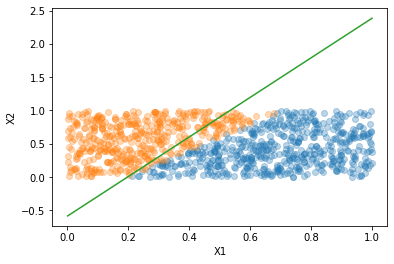

In [8]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])
